# Voronoi-Diagramme 
Das Voronoi-Diagramm für eine Menge von Punkten in der Ebene, teilt die Ebene in
Gebiete gleicher, nächster Nachbarn ein. Besteht die Menge lediglich aus zwei Punkten, so
wird die Einteilung gerade durch die Mittelsenkrechte auf der Verbindungsstrecke der
beiden Punkte realisiert.<br>
Links:<br>
- [Voronoi-Diagramme](https://de.wikipedia.org/wiki/Voronoi-Diagramm)<br>
- [Skimage](https://scikit-image.org/docs/stable/index.html)<br>
- [Scipy.spatial](https://docs.scipy.org/doc/scipy/tutorial/spatial.html)<br>
- [Matplotlib](https://matplotlib.org)<br>

## a) Originalbild laden und anzeigen
Erstelle ein Programm, mit welchem eine Fotografie eingelesen und dargestellt werden kann. Benutze dazu das Modul `skimage`. Damit du dieses importieren kannst, musst du sehr wahrscheinlich folgendes via Terminal installieren:<br>

`pip install scikit-image`<br>

Anschliessend kannst du `skimage` importieren und nutzen. Das einzulesende Bild soll ein bestehendes, aus diesem Modul sein. Du kannst es mit `data.coins()` einlesen.

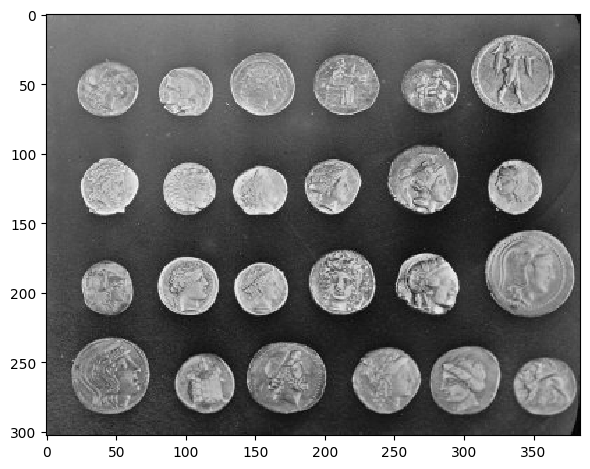

In [1]:
# das Modul heisst scikit-image, welches installiert werden muss.
# Anschliessend kann es als skimage importiert werden.
from skimage import io, data

# Schritt 1 - Bild einlesen, aktuell aus dem Modul
# skimage  mit dem import-Befehl
bild = data.coins()

# Schritt 2 - die Originalbilder zeigen
io.imshow(bild)
io.show()

## b) Ränder erkennen (Sobel-Filter)
Ergänze dein Programm so, dass mit einem Filter das Innere der Münzen "verschwindet" und nur noch die Ränder angezeigt werden. Dieser Schritt wird für unsere Problemstellung nicht benötigt aber ich wollte euch zeigen, wie einfach man mit diesen Befehlen komplexe Sachverhalte lösen kann.

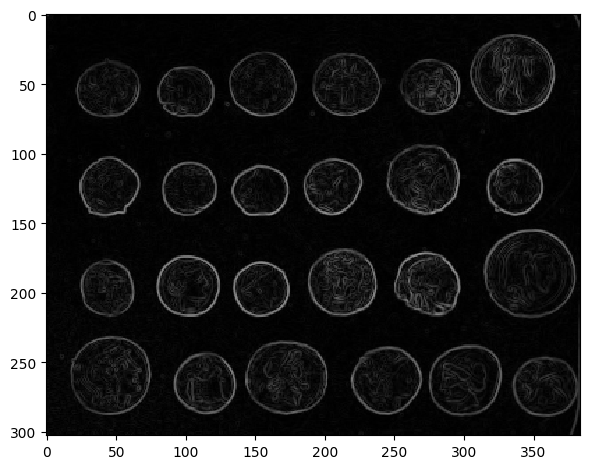

In [2]:
from skimage import filters

# Schritt 3 - mit einem Filter nur die Ränder anzeigen
ecken = filters.sobel(bild)
io.imshow(ecken)
io.show()


## c) Weichzeichnen (Gauss-Filter)
Ergänze dein Programm so, dass mit einem Filter das Innere der Münzen "verschwommen" dargestellt wird. Das heisst, dass die inneren Pixel möglichst alle homogen bezüglich der Farbwerte sind.

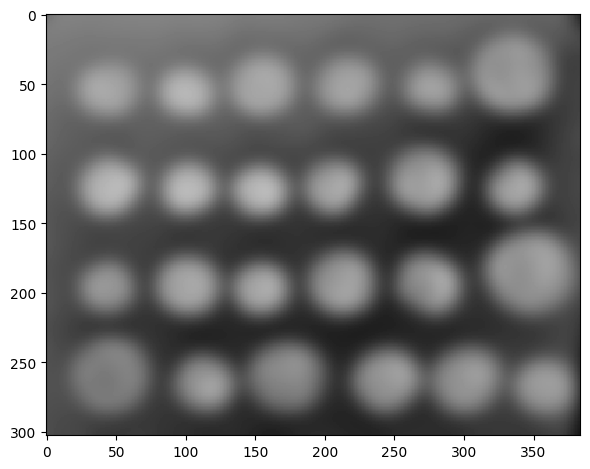

In [3]:
# Schritt 4 - einen anderen Filter anwenden
bild_verschwommen = filters.gaussian(bild, sigma=7)
io.imshow(bild_verschwommen, cmap='gray')
io.show()

## Die Zentrumspunkte identifizieren
Ergänze dein Programm so, dass mit der Methode `peak_local_max(image, min_distance, ...)` die sogenannten Zentrumswerte der Münzen gefunden werden kann. Somit sind wir soweit, dass die einzelnen Münzen "erkannt" worden sind.

Anzahl Zentrumspunkte oder Münzen: 24


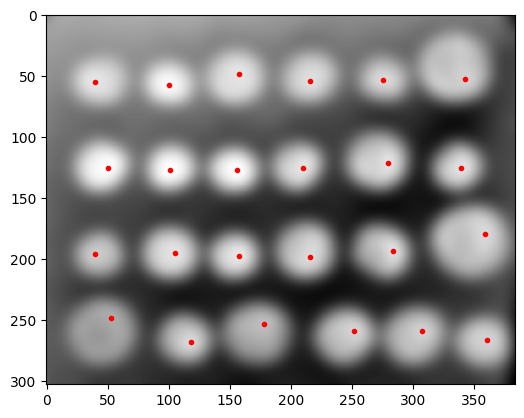

In [4]:
from skimage.feature import peak_local_max
from matplotlib import pyplot as plt

# Schritt 5 - die Zentrums-Punkte der einzelnen Geldmünzen
# identifizieren und ausgeben, manchmal muss hier an der Distanz
# etwas "herumgespielt" werden. mit 25: 26, 30: 25, 35: 24
koordinaten = peak_local_max(bild_verschwommen, min_distance = 35, exclude_border = False)
plt.imshow(bild_verschwommen, cmap='gray')
plt.plot(koordinaten[:, 1], koordinaten[:, 0], 'r.')

# Anzahl Zentrumspunkte = Anzahl Münzen, abhängig vom 
# Parameter: min_distance
print("Anzahl Zentrumspunkte oder Münzen:", len(koordinaten))

## Die Voronoi-Regionen bestimmen und visualisieren
Im letzten Schritt wollen wir noch die Voronoi-Regionen berechnen und grafisch darstellen. Diese grenzen die einzelnen Münzen voneinander ab.

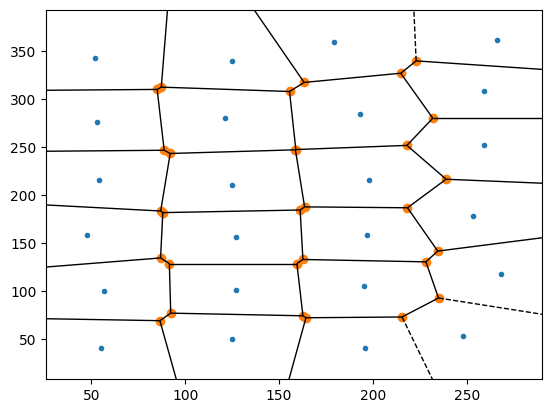

In [5]:
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib import pyplot as plt

# Schritt 6 - die Voronoiregionen eintragen
vor_3 = Voronoi(koordinaten)
fig_3 = voronoi_plot_2d(vor_3)
#plt.axis('off')
plt.show()